<a href="https://colab.research.google.com/github/piyush1856/neural-network/blob/main/_6Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
#https://drive.google.com/file/d/1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 11.9MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('multiclass.csv')

df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [4]:
df.shape

(440, 8)

### EDA

In [5]:
df = pd.get_dummies(df, columns = ['Region'])

#storing class label
Y = df['class']
df = pd.get_dummies(df, columns = ['class'])

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,False,False,True,False,True,False
1,7057,9810,9568,1762,3293,1776,False,False,True,False,True,False
2,6353,8808,7684,2405,3516,7844,False,False,True,False,True,False
3,13265,1196,4221,6404,507,1788,False,False,True,True,False,False
4,22615,5410,7198,3915,1777,5185,False,False,True,True,False,False


In [6]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reducing features to just 2 features
pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

(440, 2)

[0.45961362 0.40517227]


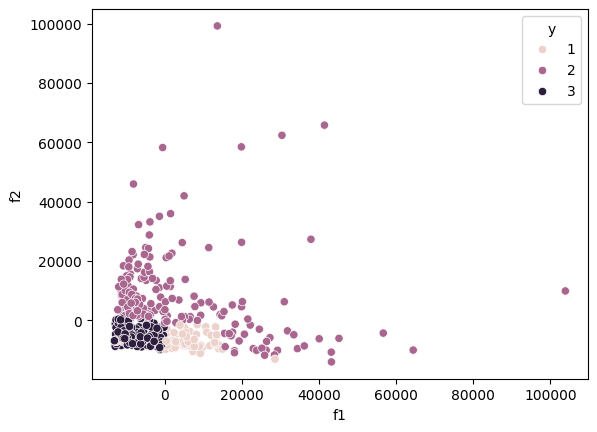

In [8]:
df2 = pd.DataFrame(visual_1, columns=['f1', 'f2'])
df2['y'] = Y
print(pca.explained_variance_ratio_)
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
def create_baseline():

  model = Sequential([
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(128, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(3,activation='softmax')])
  return model

In [13]:
model = create_baseline()

Using MiniBatch GD as Optimizer

In [14]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.CategoricalCrossentropy() )


In [15]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - loss: 1.1139 - val_loss: 1.1136
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.1055 - val_loss: 1.1030
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.0979 - val_loss: 1.0929
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 1.0910 - val_loss: 1.0836
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.0847 - val_loss: 1.0749
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.0788 - val_loss: 1.0667
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 1.0733 - val_loss: 1.0588
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 1.0680 - val_loss: 1.0515
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 1.0631 - val_loss: 1.0447
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 1.0585 - val_loss: 1.0383


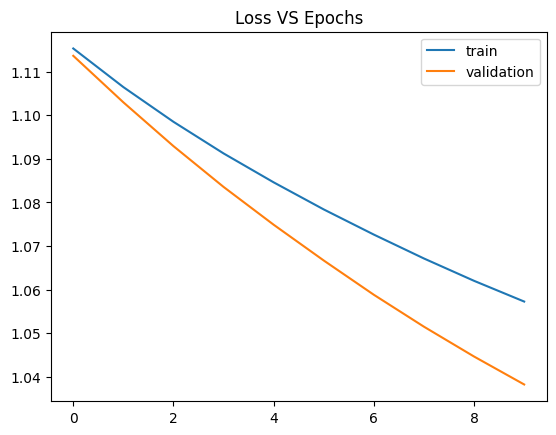

In [16]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



Observe

After 10 epochs the model still has a very high loss


What should be done to make the model perform better ?
Ans: increase the training epochs of the model

Lets now increase the epoch of model to 200

In [17]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=200, batch_size=128, verbose = 0)


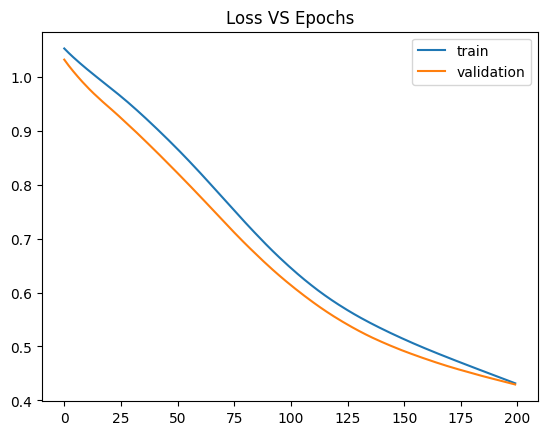

In [18]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



observe

The model requires 210 epochs:

For it to have such a low loss
Now imagine if the dataset has 5 million samples:

The model will require a very high training epoch
in order for it to reach global minima
This surely will be a huge drawback:

While deploying the model

Lets now implement Gradient Descent with momentum on our model

In [19]:
model_gdm = create_baseline()

In [20]:
model_gdm.compile(optimizer = tf.keras.optimizers.SGD(momentum=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )


In [21]:
history = model_gdm.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


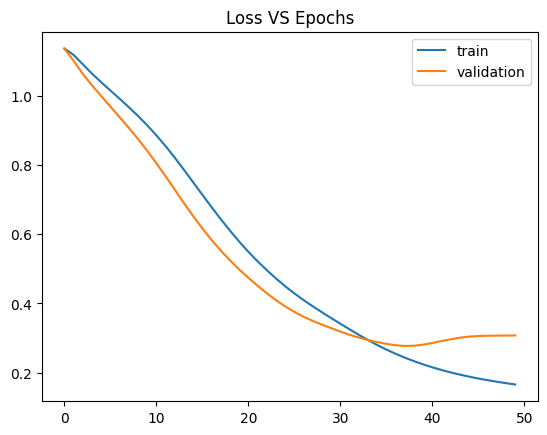

In [22]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



Observe

Just by using Momentum with Gradient Descent:

The model was able to perform so much better in just 25 epochs

### RMSprop

In [23]:
model_rms = create_baseline()

In [24]:
model_rms.compile(optimizer = tf.keras.optimizers.RMSprop(rho=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )


In [25]:
history = model_rms.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


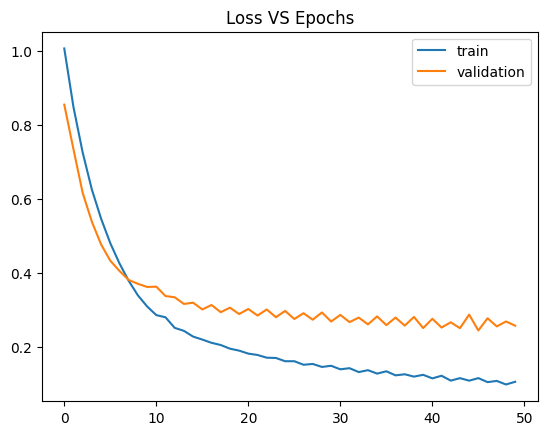

In [26]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



Observe

Though RMSProp reaches minima within 10 training epochs:

we see a lot of oscillations than Gradient Descent with momentum
meaning the optimizer still takes steps in the direction not to the global minima

### Adam

In [27]:
model_adam = create_baseline()

In [28]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy() )


In [29]:
history = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


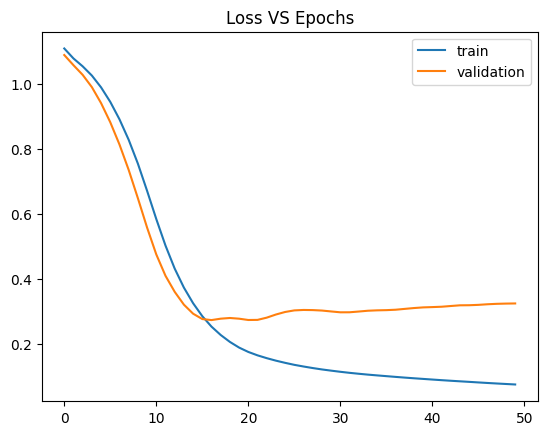

In [30]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



Observe

How using Adam algorithm,

the oscillations are reduced drastically
also the model takes almost 12 epochs for it to show accruate results
But the model performance on the validation is still high

Lets now implement Learning Rate decay using LearningRateScheduler

In [31]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [32]:
def scheduler(epoch, lr):
  r_0 = 0.01
  lr = (1/(1+r_0*epoch))*lr

  return lr

In [33]:
LRdecay = LearningRateScheduler(scheduler)

In [34]:
model_adam = create_baseline()

In [35]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy() )


In [36]:
history = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128,callbacks=[LRdecay], verbose = 0)


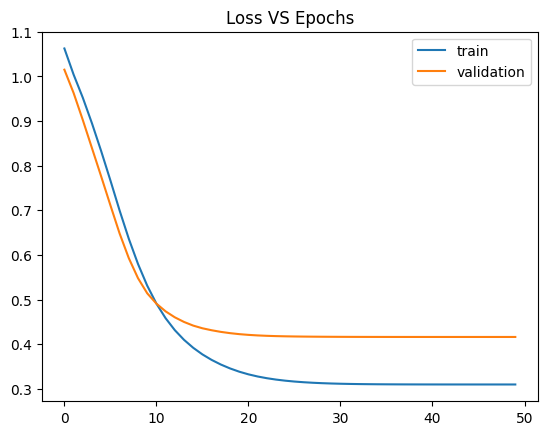

In [37]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



observe

How by using Learning Rate decay,

the model reaches a loss of around 0.3 now
Showing that reducing the Learning Rate did help improve model performance